# DM-Practical-01-A 

## Question 1: Data Exploration

## I) Descriptive statistics


In [857]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import math 

df = pd.read_csv('diabetes.csv')

In [858]:
# “diabetes.csv” consists of several medical variables and one target variable,Outcomes
df = pd.read_csv('diabetes.csv')

Q1 

In [859]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   15        1

In [860]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               788 non-null    int64  
 1   Glucose                   788 non-null    int64  
 2   BloodPressure             765 non-null    float64
 3   SkinThickness             788 non-null    int64  
 4   Insulin                   788 non-null    int64  
 5   BMI                       788 non-null    float64
 6   DiabetesPedigreeFunction  788 non-null    float64
 7   Age                       788 non-null    int64  
 8   Outcome                   788 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 55.5 KB


Q2 

In [861]:
print("Rows",len(df))
print("Column",len(df.columns))

Rows 788
Column 9


Q3

In [862]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   788.000000  788.000000     765.000000     788.000000  788.000000   
mean      3.840102  120.864213      69.186928      20.568528   79.568528   
std       3.371503   31.751346      19.493665      15.959737  114.426837   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.000000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  788.000000                788.000000  788.000000  788.000000  
mean    31.988071                  0.472707   33.215736    0.347716  
std      7.937756                  0.329649   11.819875    0.476548  
min      0.000000                  0.078000   12.000000    0.000000  
25%     27.300000                  0.245000   24.000000    0.000000  
50%     32.000000                  0.374500   29.000000    0.000000  
75%     36.600000                  0.627500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [863]:
dmin = df.Age.min()
print("Min = ",dmin)

dmax = df.Age.max()
print("Max = ",dmax)

dmean = df.Age.mean()
print("Mean = ",dmean)

dstd = df.Age.std()
print("Standard Deviation = ",dstd)

Min =  12
Max =  81
Mean =  33.21573604060914
Standard Deviation =  11.819874550957667


Q4

In [864]:
# Modality Means Calculate the frequent number of particular column 
print("Here Age has Unimode Modality because it has only 22 repeats frequently") 
dmode = df.Age.mode()
print("Unimode Modality ",dmode)

Here Age has Unimode Modality because it has only 22 repeats frequently
Unimode Modality  0    22
Name: Age, dtype: int64


Q5

In [865]:
quartiles = df['Age'].quantile([0.25,0.5,0.75])
print(quartiles)

0.25    24.0
0.50    29.0
0.75    41.0
Name: Age, dtype: float64


Q6

In [866]:
# InterQuartile = Q3-Q1
quartiles = df['Age'].quantile([0.25,0.5,0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

17.0


Q7

In [867]:
print('Min=',dmin)
print('Quartile 1=',quartiles[0.25])
print('Quartile 2=',quartiles[0.5])
print('Quartile 3=',quartiles[0.75])
print('Max=',dmax)


Min= 12
Quartile 1= 24.0
Quartile 2= 29.0
Quartile 3= 41.0
Max= 81


## II) Data Visualizatiuon 

II) Q1


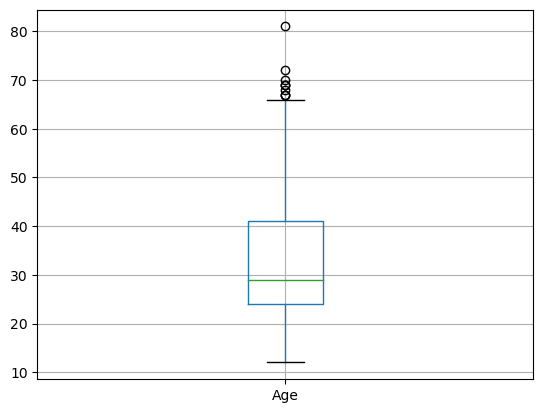

In [868]:
df.boxplot(column='Age')
plt.show()

Q2

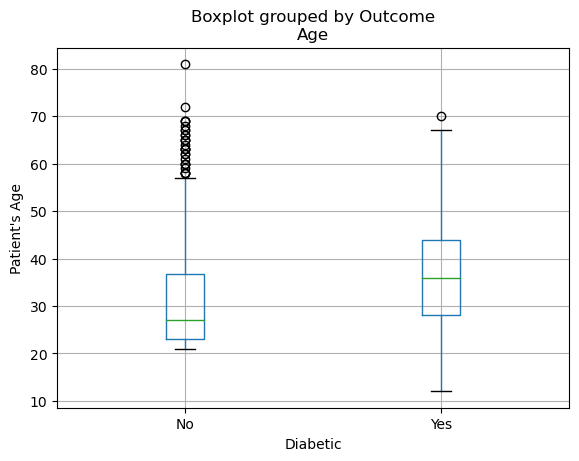

In [869]:
# Show a boxplot of the ‘age’ column of the diabetic and no-diabetic groups side by side.
df.boxplot(column='Age', by='Outcome')
plt.ylabel("Patient's Age")
plt.xlabel('Diabetic')
plt.xticks([1,2],['No','Yes'])
plt.show()

Q3

QUESTION - Based on the boxplot of question 2, analyse the relationship between the patient’s age and
being diabetic.

ANSWER - 

1) The purpose of the above box plot is to visualize or Analyse the relationship between the Patient's Age and being diabetic. 

2) This graph represent the each data point on the graph using box points.
3) Box points are used to analyse the patterns and correlations. 
4) Each data point location of the Box plot depends on the Age and Diabetic.
5) There are some outliers (Upper Bound) for the Non Diabetic and Diabetic which started from patient’s age of 58-80.
6) In Non-Diabetic there is slight difference in the Q1(25%) and MEDIAN whereas there is no difference in Diabetic
7) In Diabetic there is perfect MEDIAN value lies in between the boxplot. 

As we see here dibetic values depends on the person's age. Exapmle - Patient’s Age of 20-35 they are mostly non-diabetic and 30-45 being diabetic. 

Q4

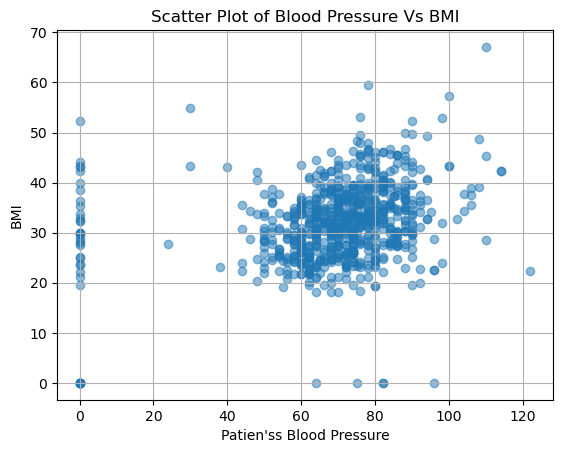

In [870]:
bloodP = df['BloodPressure']
bmi = df['BMI']


plt.scatter(bloodP, bmi, alpha=0.5)    # alpha is used to make points transparent to address overlapping data 
plt.ylabel("BMI")
plt.xlabel("Patien'ss Blood Pressure")

plt.title("Scatter Plot of Blood Pressure Vs BMI")
plt.grid(True) # Grid give the lines for better clarrification 
plt.show()

Q5

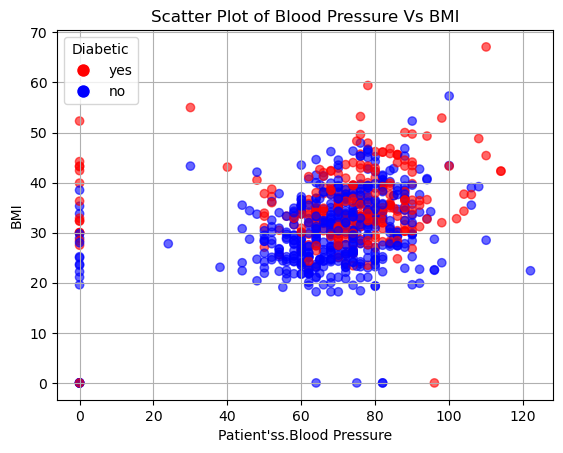

In [871]:
dia = df['Outcome'].replace({0: 'no', 1: 'yes'})

blood_pressure = df['BloodPressure']
bmi = df['BMI']
diabetic = df['Outcome']

colors = {'yes': 'red', 'no': 'blue'}



plt.scatter(blood_pressure, bmi, c=[colors[x] for x in dia], alpha=0.6)
plt.xlabel("Patient'ss.Blood Pressure")
plt.ylabel("BMI")

legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10, label=label) for label in colors]
plt.legend(handles=legend, title='Diabetic')

plt.title("Scatter Plot of Blood Pressure Vs BMI")
plt.grid(True)
plt.show()


Q6

QUESTION - Based on the scatterplot of question 5, analyse the relationship between BMI/Blood pressure
and diabetes.

ANSWER - 

1) The purpose of the above scatterplot plot is to visualize or Analyse the relationship between the Blood pressure and BMI.

2) X axis = Patien's Blood Pressure and Y axis = BMI
3) It shows the ratio of BMI and Blood Pressure of the patient's 
4) The scatter plot of Blood Pressure and BMI gives us the relationship between them. Here we see that there are some outliers in both being diabetic and non diabetic.
5) we see that most of the BMI VS Blood Pressure data scatter approximately towards the center. 
6) It is clearly visible that there are 2 clusters of red (Diabetic) and Blue (Non Diabetic) on the basis of BMI and Blood Pressure. 

# III) Data filtering

In [872]:
# For my Reference 
print("Total Insulin Records : ",len(df.Insulin))
print("Max Value of Insulin Records",max(df.Insulin))

Insulin_patient = df.Insulin.count() > 400
print("Insulin patient",Insulin_patient)

Total Insulin Records :  788
Max Value of Insulin Records 846
Insulin patient True


Q1

In [873]:
Insulin_patient = df[df['Insulin'] > 400]
print("Patients with Insulin more than 400 = ", len(Insulin_patient))

#a = Insulin_patient.Outcome == 1  # This is only for reference to check the values 
#print(a)

diabetic_patient_count = Insulin_patient[Insulin_patient['Outcome'] == 1].shape[0]
non_diabetic_patient_count = Insulin_patient[Insulin_patient['Outcome'] == 0].shape[0]

print("Diabetic patients selected=", diabetic_patient_count)
print("Non-diabetic patients selected=", non_diabetic_patient_count)

Patients with Insulin more than 400 =  20
Diabetic patients selected= 12
Non-diabetic patients selected= 8


Q2

In [874]:
Insulin_Glucose_patient = df[(df['Insulin'] > 400) & (df['Glucose'] > 175)]
print("Patients with Insulin greater than 400 and Glucose Greater than 175 = ", len(Insulin_Glucose_patient))

diabetic_patient_count = Insulin_Glucose_patient[Insulin_Glucose_patient['Outcome'] == 1]
#display(diabetic_patient_count)

non_diabetic_patient_count = Insulin_Glucose_patient[Insulin_Glucose_patient['Outcome'] == 0]
#display(non_diabetic_patient_count)

print("Diabetic patients selected=", len(diabetic_patient_count))    # len is used to count instead of shape 
print("Non-diabetic patients selected=", len(non_diabetic_patient_count))

Patients with Insulin greater than 400 and Glucose Greater than 175 =  6
Diabetic patients selected= 5
Non-diabetic patients selected= 1


Q3

In [875]:
patients = df[(df['Pregnancies'] > 5) & (df['Age'] > 45)]

print("Glucose level of a patient with more than 5 pregnancies and older than 45 =",len(patients))

patients = patients['Glucose'].mean()
print("Average of Patients = ", patients)

Glucose level of a patient with more than 5 pregnancies and older than 45 = 73
Average of Patients =  135.36986301369862


Q4

In [876]:
distinct_values = df['Pregnancies'].unique()
# display(distinct_values)

print("Distinct Values of Pregnancies = ",len(distinct_values))

Distinct Values of Pregnancies =  17


Q5

In [877]:
df.groupby('Pregnancies')['Outcome'].value_counts(normalize="True").mul(100)

Pregnancies  Outcome
0            0           66.071429
             1           33.928571
1            0           77.304965
             1           22.695035
2            0           82.407407
             1           17.592593
3            0           64.473684
             1           35.526316
4            0           66.666667
             1           33.333333
5            0           63.793103
             1           36.206897
6            0           68.000000
             1           32.000000
7            1           56.521739
             0           43.478261
8            1           55.000000
             0           45.000000
9            1           65.517241
             0           34.482759
10           0           58.333333
             1           41.666667
11           1           63.636364
             0           36.363636
12           0           55.555556
             1           44.444444
13           1           54.545455
             0           45.454545

# Question 2: Data Cleaning

## I) Duplicated removal

Q1

In [878]:
duplicate_rows = df.duplicated()
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
783     True
784     True
785     True
786     True
787     True
Length: 788, dtype: bool


Q2

In [879]:
no_duplicates = df.drop_duplicates()
display(no_duplicates)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35        0  33.6   
1              1       85           66.0             29        0  26.6   
2              8      183           64.0              0        0  23.3   
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             48      180  32.9   
764            2      122           70.0             27        0  36.8   
765            5      121           72.0             23      112  26.2   
766            1      126           60.0              0        0  30.1   
767            1       93           70.0             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   15        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

Q3

In [880]:
print(no_duplicates.shape)

(768, 9)


Q4

In [881]:
print(duplicate_rows.shape[0] - no_duplicates.shape[0] )

20


# II) Missing values

Q1

In [882]:
# 23 missing values in Blood Pressure
bloodP_missing_values = df['BloodPressure'].isna().sum()
print(bloodP_missing_values)

23


Q2

In [883]:
# dropna() 
df_BloodPressure = no_duplicates.dropna(subset=['BloodPressure'])
# display(df.BloodPressure) This is for reference to check the outpurt is correct or not 
display(df_BloodPressure)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35        0  33.6   
1              1       85           66.0             29        0  26.6   
2              8      183           64.0              0        0  23.3   
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             48      180  32.9   
764            2      122           70.0             27        0  36.8   
765            5      121           72.0             23      112  26.2   
766            1      126           60.0              0        0  30.1   
767            1       93           70.0             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   15        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[745 rows x 9 columns]

Q3

In [884]:
# Copy Column
df2 = df_BloodPressure[['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].copy()

display(df2)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35        0  33.6   
1              1       85           66.0             29        0  26.6   
2              8      183           64.0              0        0  23.3   
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             48      180  32.9   
764            2      122           70.0             27        0  36.8   
765            5      121           72.0             23      112  26.2   
766            1      126           60.0              0        0  30.1   
767            1       93           70.0             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   15  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[745 rows x 8 columns]

Q4

In [885]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df2, test_size=0.10, random_state=42)

display(X_train)
display(X_test)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
77             5       95           72.0             33        0  37.7   
222            7      119            0.0              0        0  25.2   
512            9       91           68.0              0        0  24.2   
437            5      147           75.0              0        0  29.9   
67             2      109           92.0              0        0  42.7   
..           ...      ...            ...            ...      ...   ...   
76             7       62           78.0              0        0  32.6   
114            7      160           54.0             32      175  30.5   
284            2      108           80.0              0        0  27.0   
455           14      175           62.0             30        0  33.6   
109            0       95           85.0             25       36  37.4   

     DiabetesPedigreeFunction  Age  
77                      0.370   27  
222                     0.209   37  
512                     0.200   58  
437                     0.434   28  
67                      0.845   54  
..                        ...  ...  
76                      0.391   41  
114                     0.588   39  
284                     0.259   52  
455                     0.212   38  
109                     0.247   24  

[670 rows x 8 columns]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
220            0      177           60.0             29      478  34.6   
273            1       71           78.0             50       45  33.2   
104            2       85           65.0              0        0  39.6   
158            2       88           74.0             19       53  29.0   
413            1      143           74.0             22       61  26.2   
..           ...      ...            ...            ...      ...   ...   
718            1      108           60.0             46      178  35.5   
766            1      126           60.0              0        0  30.1   
228            4      197           70.0             39      744  36.7   
354            3       90           78.0              0        0  42.7   
523            9      130           70.0              0        0  34.2   

     DiabetesPedigreeFunction  Age  
220                     1.072   21  
273                     0.422   21  
104                     0.930   27  
158                     0.229   22  
413                     0.256   21  
..                        ...  ...  
718                     0.415   24  
766                     0.349   47  
228                     2.329   31  
354                     0.559   21  
523                     0.652   45  

[75 rows x 8 columns]

In [886]:
X_test_simple_imputed =  X_test.copy()

X_test_simple_imputed['Glucose'] =  np.nan

X_test_simple_imputed

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
220            0      NaN           60.0             29      478  34.6   
273            1      NaN           78.0             50       45  33.2   
104            2      NaN           65.0              0        0  39.6   
158            2      NaN           74.0             19       53  29.0   
413            1      NaN           74.0             22       61  26.2   
..           ...      ...            ...            ...      ...   ...   
718            1      NaN           60.0             46      178  35.5   
766            1      NaN           60.0              0        0  30.1   
228            4      NaN           70.0             39      744  36.7   
354            3      NaN           78.0              0        0  42.7   
523            9      NaN           70.0              0        0  34.2   

     DiabetesPedigreeFunction  Age  
220                     1.072   21  
273                     0.422   21  
104                     0.930   27  
158                     0.229   22  
413                     0.256   21  
..                        ...  ...  
718                     0.415   24  
766                     0.349   47  
228                     2.329   31  
354                     0.559   21  
523                     0.652   45  

[75 rows x 8 columns]

Q5

In [887]:
#Copy X_test to a seperate data frame i.e df3 for evaluation
df3 = X_test.copy()

# Set Glucose to Null
X_test['Glucose'] = np.nan


display(X_test)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
220            0      NaN           60.0             29      478  34.6   
273            1      NaN           78.0             50       45  33.2   
104            2      NaN           65.0              0        0  39.6   
158            2      NaN           74.0             19       53  29.0   
413            1      NaN           74.0             22       61  26.2   
..           ...      ...            ...            ...      ...   ...   
718            1      NaN           60.0             46      178  35.5   
766            1      NaN           60.0              0        0  30.1   
228            4      NaN           70.0             39      744  36.7   
354            3      NaN           78.0              0        0  42.7   
523            9      NaN           70.0              0        0  34.2   

     DiabetesPedigreeFunction  Age  
220                     1.072   21  
273                     0.422   21  
104                     0.930   27  
158                     0.229   22  
413                     0.256   21  
..                        ...  ...  
718                     0.415   24  
766                     0.349   47  
228                     2.329   31  
354                     0.559   21  
523                     0.652   45  

[75 rows x 8 columns]

Q6

In [888]:
# fill mmissing value with mean
X_test['Glucose'].fillna(X_train['Glucose'].mean(), inplace=True)



# Calculate RMSE between the imputed 'Glucose' values in X_test and the original values in df3
MSE = mean_squared_error(X_test['Glucose'], df3['Glucose'])
rmse = math.sqrt(MSE)



# Display the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 34.08851888719681


In [889]:
X_test['Glucose'] = np.nan

Q7

In [890]:
# mmissing value with medain
X_test['Glucose'].fillna(X_train['Glucose'].median(), inplace=True)


# Calculate RMSE 
MSE = mean_squared_error(X_test['Glucose'], df3['Glucose'])
rmse = math.sqrt(MSE)


# Display the RMSE
print("RMSE for Median :", rmse)

RMSE for Median : 34.43486605172147


In [891]:
X_test['Glucose'] = np.nan

Q8

In [892]:
# Simple Imputer using Most Frequent Stratergy 

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train['Glucose'].values.reshape(-1,1))

X_test['Glucose'] = imputer.transform(X_test['Glucose'].values.reshape(-1,1))
X_test


MSE = mean_squared_error(X_test['Glucose'], df3['Glucose'])
rmse = math.sqrt(MSE)

# Display the RMSE
print("RMSE with 'most_frequent' Imputation:", rmse)

RMSE with 'most_frequent' Imputation: 41.11252850409471


In [893]:
X_test['Glucose'] = np.nan 

Q9

In [894]:
# Here create a KNNImputer with k=3 neighbors
KNN_imputer = KNNImputer(n_neighbors=3)

KNN_imputer.fit(X_train)
X_test = pd.DataFrame(KNN_imputer.transform(X_test),columns = X_test.columns)
X_test


MSE = mean_squared_error(X_test['Glucose'], df3['Glucose'])
rmse = math.sqrt(MSE)

# Display the RMSE
print("RMSE with 'KNN K=3' Imputation:", rmse)

RMSE with 'KNN K=3' Imputation: 30.98769170230395


Q10 

QUESTION - Which Imputer is better?

ANSWER -

1) Imputer is the best technique to fill the missing values in the dataset. 
2) Here we use the Simple Imputer "Most Frequent" and The KNN Imputer.
3) The result of the Simple Imputer is 41.11 and the KNN is 30.98 
4) As we analyse that KNN imputer is better because we got the less value compare to Simple Imputer  



# DM-Practical-01-B

## Question 1: Outliers removal and transformation

a.

In [895]:
import scipy.stats as stats
data = pd.read_csv('diabetes.csv')

skewnwss = stats.skew(data['Insulin'])
kurtosis = stats.kurtosis(data['Insulin'],fisher=False)
print("Kurtosis Insulin = ", kurtosis)
print("Skewness Insulin = ", skewnwss)

Kurtosis Insulin =  10.212285118045992
Skewness Insulin =  2.2640731933907463


b. 

In [896]:
idata = data[(data['Insulin']!=0)]
idata 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
6              3       78           50.0             32       88  31.0   
8              2      197           70.0             45      543  30.5   
13             1      189           60.0             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
778            2      129           74.0             26      205  33.2   
781            1      140           74.0             26      180  24.1   
782            1      144           82.0             46      180  46.1   
785            2      121           70.0             32       95  39.1   
786            7      129           68.0             49      125  38.5   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                       2.288   15        1  
6                       0.248   26        1  
8                       0.158   53        1  
13                      0.398   59        1  
..                        ...  ...      ...  
778                     0.591   25        0  
781                     0.828   23        0  
782                     0.335   46        1  
785                     0.886   23        0  
786                     0.439   43        1  

[404 rows x 9 columns]

c. 

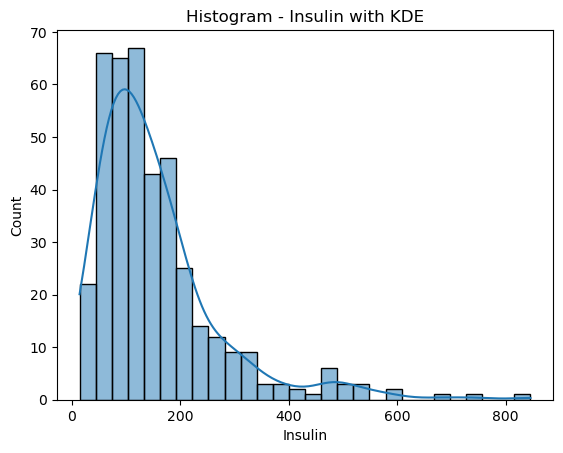

In [897]:
# kernel density estimation (KDE) curb gives us shape of our data how they spread out for user understanding
plt.figure()
sns.histplot(x=idata['Insulin'],kde=True) 
plt.title('Histogram - Insulin with KDE')

plt.show()


d. 

Q1= 77.0
Q3= 190.0
IQR = 113.0
Lower Bound =  -92.5
Upper Bound =  359.5


/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/3369701870.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_outlier = idata['Insulin'] = np.where(idata['Insulin'] < lower_bound, lower_bound, idata['Insulin'])
/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/3369701870.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_outlier = idata['Insulin'] = np.where(idata['Insulin'] > upper_bound, upper_bound, idata['Insulin'])


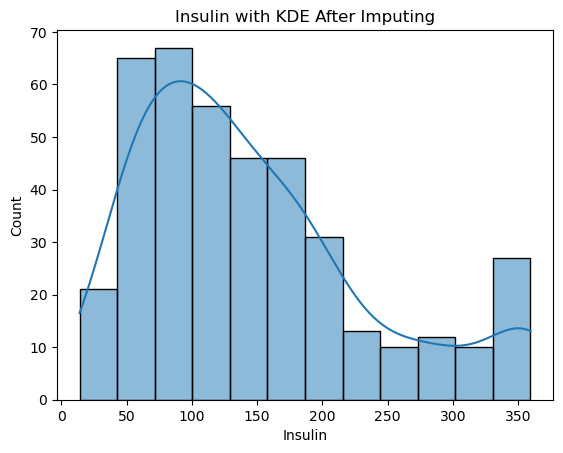

In [898]:
# Calculate the IQR for 'Insulin'
Q1 = idata['Insulin'].quantile(0.25)
Q3 = idata['Insulin'].quantile(0.75)
IQR = Q3 - Q1
print("Q1=", Q1)
print("Q3=",Q3)
print("IQR =",IQR )


# lower and upper bounds - outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound = ",lower_bound)
print("Upper Bound = ",upper_bound)

# Insulin outliers
ioutlier = idata[(idata['Insulin'] < lower_bound) | (idata['Insulin'] > upper_bound)]
ioutlier['Insulin'].count()

# Impute outliers min max 
min_outlier = idata['Insulin'] = np.where(idata['Insulin'] < lower_bound, lower_bound, idata['Insulin'])
max_outlier = idata['Insulin'] = np.where(idata['Insulin'] > upper_bound, upper_bound, idata['Insulin'])

# histogram after observe the difference -> removing outliers
plt.figure()
sns.histplot(x=idata['Insulin'], kde=True)
plt.title('Insulin with KDE After Imputing')
plt.show()


e. 

In [899]:
Insulin_before_data = idata['Insulin']
idata['Insulin'] = np.log1p(idata['Insulin'])


/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/723047823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['Insulin'] = np.log1p(idata['Insulin'])


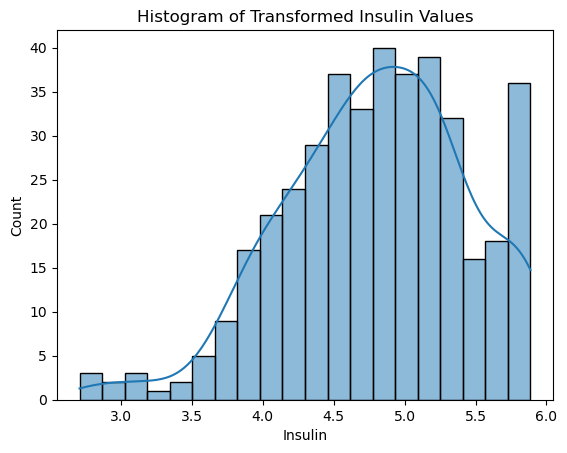

In [900]:
sns.histplot(x=idata['Insulin'], bins=20, kde=True)
plt.title('Histogram of Transformed Insulin Values')

plt.show()

f. 

In [901]:
Insulin_after_data = idata['Insulin']

In [902]:
import scipy.stats as stats

# skewness 
print("Skewness =",stats.skew(idata['Insulin']))

# kurtosis         
# Kurtosis is in Right Hand is negative i.e value is in -1 
print("Kurtosis =",stats.kurtosis(idata['Insulin'],fisher=False))


Skewness = -0.3927779688212316
Kurtosis = 3.031295173133778


g. 

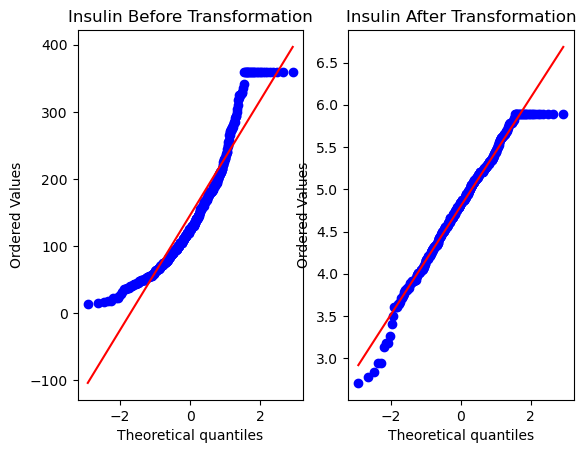

In [903]:
import scipy.stats as stats
import matplotlib.pyplot as plt


# Insulin before transformation
plt.subplot(1, 2, 1)
stats.probplot(Insulin_before_data,dist="norm", plot=plt)
plt.title('Insulin Before Transformation')

# Insulin transformed after loge (x+1) transformation
plt.subplot(1, 2, 2)
stats.probplot(Insulin_after_data, dist="norm", plot=plt)
plt.title('Insulin After Transformation')

plt.show()


h. 

Q1= 99.0
Q3= 143.0
IQR = 44.0
Lower Bound =  33.0
Upper Bound =  209.0


/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/1391422387.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_outlier = idata['Glucose'] = np.where(idata['Glucose'] < lower_bound, lower_bound, idata['Glucose'])
/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/1391422387.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_outlier = idata['Glucose'] = np.where(idata['Glucose'] > upper_bound, upper_bound, idata['Glucose'])


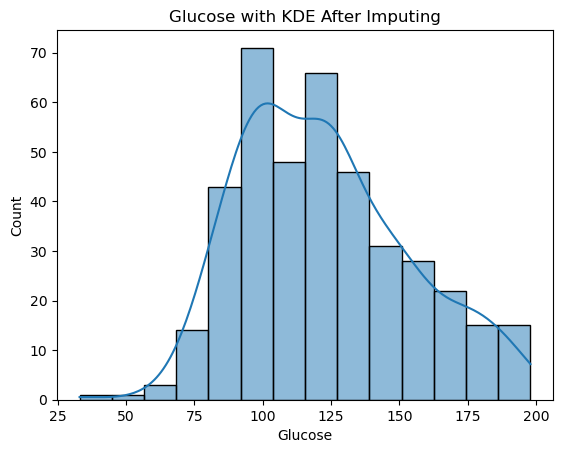

In [904]:
# Glucose 

# Calculate the IQR for 'Insulin'
Q1 = idata['Glucose'].quantile(0.25)
Q3 = idata['Glucose'].quantile(0.75)
IQR = Q3 - Q1
print("Q1=", Q1)
print("Q3=",Q3)
print("IQR =",IQR )


# lower and upper bounds - outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound = ",lower_bound)
print("Upper Bound = ",upper_bound)


# Glucose outliers
goutlier = idata[(idata['Glucose'] < lower_bound) | (idata['Glucose'] > upper_bound)]
goutlier['Glucose'].count()


# Impute outliers min max 
min_outlier = idata['Glucose'] = np.where(idata['Glucose'] < lower_bound, lower_bound, idata['Glucose'])
max_outlier = idata['Glucose'] = np.where(idata['Glucose'] > upper_bound, upper_bound, idata['Glucose'])

# histogram after observe the difference -> removing outliers
plt.figure()
sns.histplot(x=idata['Glucose'], kde=True)
plt.title('Glucose with KDE After Imputing')
plt.show()

Q1= 62.0
Q3= 78.0
IQR = 16.0
Lower Bound =  38.0
Upper Bound =  102.0


/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/134080719.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_outlier = idata['BloodPressure'] = np.where(idata['BloodPressure'] < lower_bound, lower_bound, idata['BloodPressure'])
/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/134080719.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_outlier = idata['BloodPressure'] = np.where(idata['BloodPressure'] > upper_bound, upper_bound, idata['BloodPressure'])


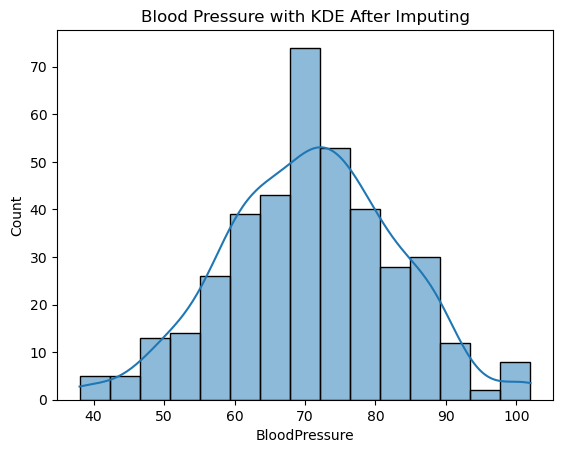

In [905]:
# Blood Pressure 

# Calculate the IQR for 'BloodPressure'
Q1 = idata['BloodPressure'].quantile(0.25)
Q3 = idata['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
print("Q1=", Q1)
print("Q3=",Q3)
print("IQR =",IQR )


# lower and upper bounds - outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound = ",lower_bound)
print("Upper Bound = ",upper_bound)


# Glucose outliers
bpoutlier = idata[(idata['BloodPressure'] < lower_bound) | (idata['BloodPressure'] > upper_bound)]
bpoutlier['BloodPressure'].count()


# Impute outliers min max 
min_outlier = idata['BloodPressure'] = np.where(idata['BloodPressure'] < lower_bound, lower_bound, idata['BloodPressure'])
max_outlier = idata['BloodPressure'] = np.where(idata['BloodPressure'] > upper_bound, upper_bound, idata['BloodPressure'])

# histogram after observe the difference -> removing outliers
plt.figure()
sns.histplot(x=idata['BloodPressure'], kde=True)
plt.title('Blood Pressure with KDE After Imputing')
plt.show()

In [906]:
# SkinThickess

# Calculate the IQR for 'BloodPressure'
Q1 = idata['SkinThickness'].quantile(0.25)
Q3 = idata['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
print("Q1=", Q1)
print("Q3=",Q3)
print("IQR =",IQR )


# lower and upper bounds - outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound = ",lower_bound)
print("Upper Bound = ",upper_bound)


# Glucose outliers
stoutlier = idata[(idata['SkinThickness'] < lower_bound) | (idata['SkinThickness'] > upper_bound)]
stoutlier['SkinThickness'].count()


# Impute outliers min max 
min_outlier = idata['SkinThickness'] = np.where(idata['SkinThickness'] < lower_bound, lower_bound, idata['SkinThickness'])
max_outlier = idata['SkinThickness'] = np.where(idata['SkinThickness'] > upper_bound, upper_bound, idata['SkinThickness'])

# histogram after observe the difference -> removing outliers
plt.figure()
sns.histplot(x=idata['SkinThickness'], kde=True)
plt.title('Skin Thickess with KDE After Imputing')
plt.show()

Q1= 21.0
Q3= 37.0
IQR = 16.0
Lower Bound =  -3.0
Upper Bound =  61.0


/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/3691618411.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_outlier = idata['SkinThickness'] = np.where(idata['SkinThickness'] < lower_bound, lower_bound, idata['SkinThickness'])
/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/3691618411.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_outlier = idata['SkinThickness'] = np.where(idata['SkinThickness'] > upper_bound, upper_bound, idata['SkinThickness'])


i.

In [907]:
# Correlation using seaborn heatmap 
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
correlation_matrix = idata[variables].corr()

sns.heatmap(correlation_matrix,linewidths=1,annot=True,cmap='cool',)
plt.title('Correlation Matrix using Seaborn Heatmap')
plt.show()

## Question 2: Data processing

a.

In [908]:
# Group the patients by number of pregnancies, along with their average BloodPressure.
patient_group = idata.groupby('Pregnancies')['BloodPressure'].mean().reset_index()

display(patient_group)


Pregnancies  BloodPressure
0             0      73.263158
1             1      68.468085
2             2      66.107692
3             3      70.177778
4             4      70.458333
5             5      73.300000
6             6      67.052632
7             7      72.476190
8             8      78.285714
9             9      80.666667
10           10      81.600000
11           11      81.600000
12           12      74.400000
13           13      86.666667
14           14      78.000000
15           15      70.000000
16           17      72.000000

b.

In [909]:
patient_group = idata.groupby('Pregnancies').agg({ 'Age': ['mean', 'sum', 'count']}).reset_index()

display(patient_group)

Pregnancies        Age            
                     mean   sum count
0            0  24.258621  1407    58
1            1  27.122449  2658    98
2            2  25.194030  1688    67
3            3  28.244444  1271    45
4            4  30.407407   821    27
5            5  34.666667   728    21
6            6  38.368421   729    19
7            7  42.761905   898    21
8            8  44.714286   626    14
9            9  46.583333   559    12
10          10  48.000000   288     6
11          11  48.400000   242     5
12          12  46.800000   234     5
13          13  46.333333   139     3
14          14  46.000000    46     1
15          15  43.000000    43     1
16          17  47.000000    47     1

c.

In [910]:
idata['BMI/Age'] = idata['BMI'] / idata['Age']
display(idata)

/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/1642326610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['BMI/Age'] = idata['BMI'] / idata['Age']


Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
3              1     89.0           66.0           23.0  4.553877  28.1   
4              0    137.0           40.0           35.0  5.129899  43.1   
6              3     78.0           50.0           32.0  4.488636  31.0   
8              2    197.0           70.0           45.0  5.887492  30.5   
13             1    189.0           60.0           23.0  5.887492  30.1   
..           ...      ...            ...            ...       ...   ...   
778            2    129.0           74.0           26.0  5.327876  33.2   
781            1    140.0           74.0           26.0  5.198497  24.1   
782            1    144.0           82.0           46.0  5.198497  46.1   
785            2    121.0           70.0           32.0  4.564348  39.1   
786            7    129.0           68.0           49.0  4.836282  38.5   

     DiabetesPedigreeFunction  Age  Outcome   BMI/Age  
3                       0.167   21        0  1.338095  
4                       2.288   15        1  2.873333  
6                       0.248   26        1  1.192308  
8                       0.158   53        1  0.575472  
13                      0.398   59        1  0.510169  
..                        ...  ...      ...       ...  
778                     0.591   25        0  1.328000  
781                     0.828   23        0  1.047826  
782                     0.335   46        1  1.002174  
785                     0.886   23        0  1.700000  
786                     0.439   43        1  0.895349  

[404 rows x 10 columns]

d.

In [911]:
# function to check Risk using rules 
def check_risk(row):
    if row['BMI'] > 45 and row['BloodPressure'] > 100:
        return 'High'
    elif 30 < row['BMI'] < 45 and row['BloodPressure'] < 100:
        return 'Medium'
    elif row['BMI'] < 30:
        return 'Low'
    else:
        return 'Unknown'
        
idata['Risk'] = idata.apply(check_risk, axis=1)
display(idata)

/var/folders/0s/8tbml_jn793dhhj1b4wgksl80000gn/T/ipykernel_54366/131288368.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['Risk'] = idata.apply(check_risk, axis=1)


Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
3              1     89.0           66.0           23.0  4.553877  28.1   
4              0    137.0           40.0           35.0  5.129899  43.1   
6              3     78.0           50.0           32.0  4.488636  31.0   
8              2    197.0           70.0           45.0  5.887492  30.5   
13             1    189.0           60.0           23.0  5.887492  30.1   
..           ...      ...            ...            ...       ...   ...   
778            2    129.0           74.0           26.0  5.327876  33.2   
781            1    140.0           74.0           26.0  5.198497  24.1   
782            1    144.0           82.0           46.0  5.198497  46.1   
785            2    121.0           70.0           32.0  4.564348  39.1   
786            7    129.0           68.0           49.0  4.836282  38.5   

     DiabetesPedigreeFunction  Age  Outcome   BMI/Age     Risk  
3                       0.167   21        0  1.338095      Low  
4                       2.288   15        1  2.873333   Medium  
6                       0.248   26        1  1.192308   Medium  
8                       0.158   53        1  0.575472   Medium  
13                      0.398   59        1  0.510169   Medium  
..                        ...  ...      ...       ...      ...  
778                     0.591   25        0  1.328000   Medium  
781                     0.828   23        0  1.047826      Low  
782                     0.335   46        1  1.002174  Unknown  
785                     0.886   23        0  1.700000   Medium  
786                     0.439   43        1  0.895349   Medium  

[404 rows x 11 columns]

e.

In [912]:
df_ages = pd.read_csv('ages.csv')

merged_df = pd.merge(idata,df_ages, on='Age')


display(merged_df)

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0              1     89.0           66.0           23.0  4.553877  28.1   
1              2    142.0           82.0           18.0  4.174387  24.7   
2              1    126.0           56.0           29.0  5.030438  28.7   
3              4     99.0           76.0           15.0  3.951244  23.2   
4              0    100.0           70.0           26.0  3.931826  30.8   
..           ...      ...            ...            ...       ...   ...   
399            1    164.0           82.0           43.0  4.219508  32.8   
400           11    138.0           74.0           26.0  4.976734  36.1   
401            8    124.0           76.0           24.0  5.887492  28.7   
402            3    176.0           86.0           27.0  5.056246  33.3   
403           10    101.0           76.0           48.0  5.198497  32.9   

     DiabetesPedigreeFunction  Age  Outcome   BMI/Age    Risk AgeGroup  
0                       0.167   21        0  1.338095     Low    Adult  
1                       0.761   21        0  1.176190     Low    Adult  
2                       0.801   21        0  1.366667     Low    Adult  
3                       0.223   21        0  1.104762     Low    Adult  
4                       0.597   21        0  1.466667  Medium    Adult  
..                        ...  ...      ...       ...     ...      ...  
399                     0.341   50        0  0.656000  Medium    Adult  
400                     0.557   50        1  0.722000  Medium    Adult  
401                     0.687   52        1  0.551923     Low    Adult  
402                     1.154   52        1  0.640385  Medium    Adult  
403                     0.171   63        0  0.522222  Medium   Senior  

[404 rows x 12 columns]

f.

In [913]:
# One-Hot Encoding
one_hot_encoded = pd.get_dummies(merged_df['AgeGroup'], prefix='AgeGroup')

merged_df = pd.concat([merged_df, one_hot_encoded], axis=1)

merged_df = merged_df.drop('AgeGroup', axis=1)

merged_df.to_csv('Merged_File.csv',index=False)

mdata = pd.read_csv('Merged_File.csv')
